In [1]:
import math
import statistics
import numpy as np
import pandas as pd
import scipy.stats

In [20]:
df = pd.read_csv(r'C:\Users\hans8626\nyc-rolling-sales.csv')
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [22]:
df.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [23]:
df.isnull()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
84544,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
84545,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
84546,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
df.shape

(84548, 22)

In [25]:
df['TOTAL UNITS'].mean()

2.249183895538629

In [40]:
df['SALE PRICE']

0         6625000
1             -  
2             -  
3         3936272
4         8000000
           ...   
84543      450000
84544      550000
84545      460000
84546    11693337
84547       69300
Name: SALE PRICE, Length: 84548, dtype: object

In [41]:
df['SALE PRICE'] = df['SALE PRICE'].fillna(0)

In [42]:
df['SALE PRICE']

0         6625000
1             -  
2             -  
3         3936272
4         8000000
           ...   
84543      450000
84544      550000
84545      460000
84546    11693337
84547       69300
Name: SALE PRICE, Length: 84548, dtype: object

In [44]:
np.median(df['RESIDENTIAL UNITS'])

1.0

In [48]:
statistics.mode(df['TOTAL UNITS'])

1

In [53]:
df.loc[df['SALE PRICE'] =='10000']

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
9677,9681,1,MIDTOWN WEST,26 OTHER HOTELS,4,1009,37,,H3,102 WEST 57TH STREET,...,0,2,2,7532,112850,2007,4,H3,10000,2016-09-02 00:00:00
9715,9719,1,MIDTOWN WEST,45 CONDO HOTELS,4,1006,1302,,RH,1335 AVENUE OF THE AMER,...,0,0,1,-,-,1963,4,RH,10000,2017-03-21 00:00:00
16490,16494,1,UPPER WEST SIDE (59-79),47 CONDO NON-BUSINESS STORAGE,4,1171,2285,,RS,240 RIVERSIDE BOULEVARD,...,0,0,1,-,-,2004,4,RS,10000,2017-06-09 00:00:00
16882,16886,1,UPPER WEST SIDE (79-96),10 COOPS - ELEVATOR APARTMENTS,2,1232,61,,D4,"514 WEST END AVENUE, ROOF",...,0,0,0,-,-,1923,2,D4,10000,2017-05-25 00:00:00
18569,267,2,BAYCHESTER,02 TWO FAMILY DWELLINGS,1,4752,73,,B1,3214 GUNTHER AVENUE,...,2,0,2,1880,2080,1970,1,B1,10000,2016-10-13 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75182,25784,4,WHITESTONE,09 COOPS - WALKUP APARTMENTS,2,4459,62,,C6,"10-31A WHITESTONE EXPRESSWA, GS #3",...,0,0,0,-,-,1959,2,C6,10000,2017-05-05 00:00:00
76555,421,5,ARDEN HEIGHTS,02 TWO FAMILY DWELLINGS,1,5777,23,,B2,309 ARDEN AVENUE,...,2,0,2,18310,2450,1990,1,B2,10000,2016-11-14 00:00:00
79233,3099,5,HUGUENOT,01 ONE FAMILY DWELLINGS,1,6816,37,,A2,466 ELLSWORTH AVENUE,...,1,0,1,7571,934,1970,1,A2,10000,2016-09-23 00:00:00
81579,5445,5,PORT IVORY,31 COMMERCIAL VACANT LAND,4,1290,305,,V1,WOODCLIFF AVENUE,...,0,0,0,3102,-,0,4,V1,10000,2017-02-23 00:00:00


In [51]:
import matplotlib.pyplot as mlt

In [52]:
df['SALE PRICE'].plot()

TypeError: no numeric data to plot

In [54]:
max(df['SALE PRICE'])

'9999999'

In [55]:
min(df['SALE PRICE'])

' -  '

In [56]:
np.amax(df['SALE PRICE']) - np.amin(df['SALE PRICE'])

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [60]:
statistics.pvariance(df['RESIDENTIAL UNITS'])

279.5897719238569

In [61]:
std = statistics.stdev(df['RESIDENTIAL UNITS'])

In [62]:
std

16.72103701446788

In [63]:
import seaborn as sns

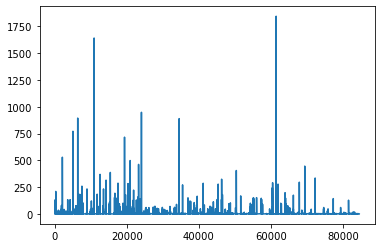

In [65]:
df['RESIDENTIAL UNITS'].plot()